Because we can and we really liked `mplleaflet`.

In [1]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline
import mplleaflet
import pandas
import geopy
from geopy.geocoders import Nominatim

plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [2]:
# Load data from CSV
openpaths = pandas.read_csv('openpaths_habi.csv', parse_dates=[3])
openpaths.describe()

,lat,lon,alt,version
count,28275.000000,28275.000000,28275.000000,2.827500e+04
mean,46.336489,14.821240,514.422474,1.100000e+00
std,3.143443,29.446446,362.733171,5.535670e-13
min,30.024679,-9.880663,-48.000000,1.100000e+00
25%,46.931829,7.437073,356.000000,1.100000e+00
50%,46.968079,7.900918,489.330231,1.100000e+00
75%,47.481705,8.220958,553.736145,1.100000e+00
max,53.586563,141.174377,3893.417969,1.100000e+00


In [3]:
# Use only this years data
whichyear = 2016
thisyear = openpaths[pandas.Timestamp(str(whichyear)) < openpaths['date']]
thisyear = thisyear[thisyear['date'] < pandas.Timestamp(str(whichyear + 1))]
thisyear.describe()

,lat,lon,alt,version
count,5506.000000,5506.000000,5506.000000,5.506000e+03
mean,46.124658,6.798678,630.226478,1.100000e+00
std,3.620670,3.809809,459.926417,7.439170e-14
min,30.024679,-9.880663,-13.777588,1.100000e+00
25%,46.908464,7.420402,427.891937,1.100000e+00
50%,46.941359,7.453711,550.000000,1.100000e+00
75%,47.123347,7.969223,563.782547,1.100000e+00
max,47.572887,9.560509,3893.417969,1.100000e+00


In [4]:
# Address search with `geopy` and https://wiki.openstreetmap.org/wiki/Nominatim
geolocator = Nominatim()
location = geolocator.reverse('%s, %s' % (thisyear['lat'].median(), thisyear['lon'].median()))
print('We were in %s in %s' % (location.raw.get('address').get('suburb'), location.raw.get('address').get('city')))
print('Or more detailed in %s' % location.address)

We were in Kirchenfeld in Bern
Or more detailed in 42, Hallwylstrasse, Kirchenfeld, Stadtteil IV, Bern, Verwaltungskreis Bern-Mittelland, Bern - Berne, 3005, Schweiz, Suisse, Svizzera, Svizra


In [5]:
# Highest point
point = thisyear.loc[thisyear['alt'] == thisyear['alt'].max()]
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
print('We were in %s in %s' % (location.raw.get('address').get('suburb'), location.raw.get('address').get('village')))
print('Or more detailed in %s' % location.raw)

We were in Trockener Steg in Zermatt
Or more detailed in {'place_id': '40786355', 'display_name': 'Viewpoint Breithorn, Klein Matterhorn, Trockener Steg, Zermatt, Visp, Valais - Wallis, 3920, Schweiz, Suisse, Svizzera, Svizra', 'address': {'state': 'Valais - Wallis', 'county': 'Visp', 'suburb': 'Trockener Steg', 'viewpoint': 'Viewpoint Breithorn', 'country_code': 'ch', 'country': 'Schweiz, Suisse, Svizzera, Svizra', 'postcode': '3920', 'village': 'Zermatt', 'footway': 'Klein Matterhorn'}, 'osm_id': '2999817467', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'node', 'lon': '7.7299223', 'lat': '45.9386804', 'boundingbox': ['45.9385804', '45.9387804', '7.7298223', '7.7300223']}


In [6]:
# sorted(thisyear['alt'])

In [7]:
# Lowest point
point = thisyear.loc[thisyear['alt'] ==  1.6466674804700001]
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
print('We were in %s in %s' % (location.raw.get('address').get('suburb'), location.raw.get('address').get('village')))
print('Or more detailed in %s' % location.raw)

We were in None in Sidi Ouassay ⵙⵉⴷⵉ ⵡⴰⵙⴰⵢ سيدي وساي
Or more detailed in {'place_id': '83315838', 'display_name': 'P1018, Sidi Ouassay ⵙⵉⴷⵉ ⵡⴰⵙⴰⵢ سيدي وساي, caïdat de Massa, cercle de Belfaa-Massa, Province de Chtouka Aït Baha ⵍⵉⵇⵍⵉⵎ ⵏ ⵛⵜⵓⴽⴰ ⴰⵢⵜ ⴱⴰⵀⴰ إقليم شتوكة آيت باها, Souss-Massa ⵙⵓⵙⵙ-ⵎⴰⵙⵙⴰ سوس-ماسة, Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'address': {'state_district': 'Province de Chtouka Aït Baha ⵍⵉⵇⵍⵉⵎ ⵏ ⵛⵜⵓⴽⴰ ⴰⵢⵜ ⴱⴰⵀⴰ إقليم شتوكة آيت باها', 'village': 'Sidi Ouassay ⵙⵉⴷⵉ ⵡⴰⵙⴰⵢ سيدي وساي', 'road': 'P1018', 'country_code': 'ma', 'country': 'Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'county': 'caïdat de Massa', 'region': 'Souss-Massa ⵙⵓⵙⵙ-ⵎⴰⵙⵙⴰ سوس-ماسة'}, 'osm_id': '89330090', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'way', 'lon': '-9.636588', 'lat': '30.0662302', 'boundingbox': ['30.0337501', '30.083329', '-9.6609699', '-9.6324018']}


In [8]:
# Plot the data
plt.scatter(thisyear['lon'][::50],thisyear['lat'][::50], color='black', alpha=0.5)
mplleaflet.display(tiles='stamen_wc')

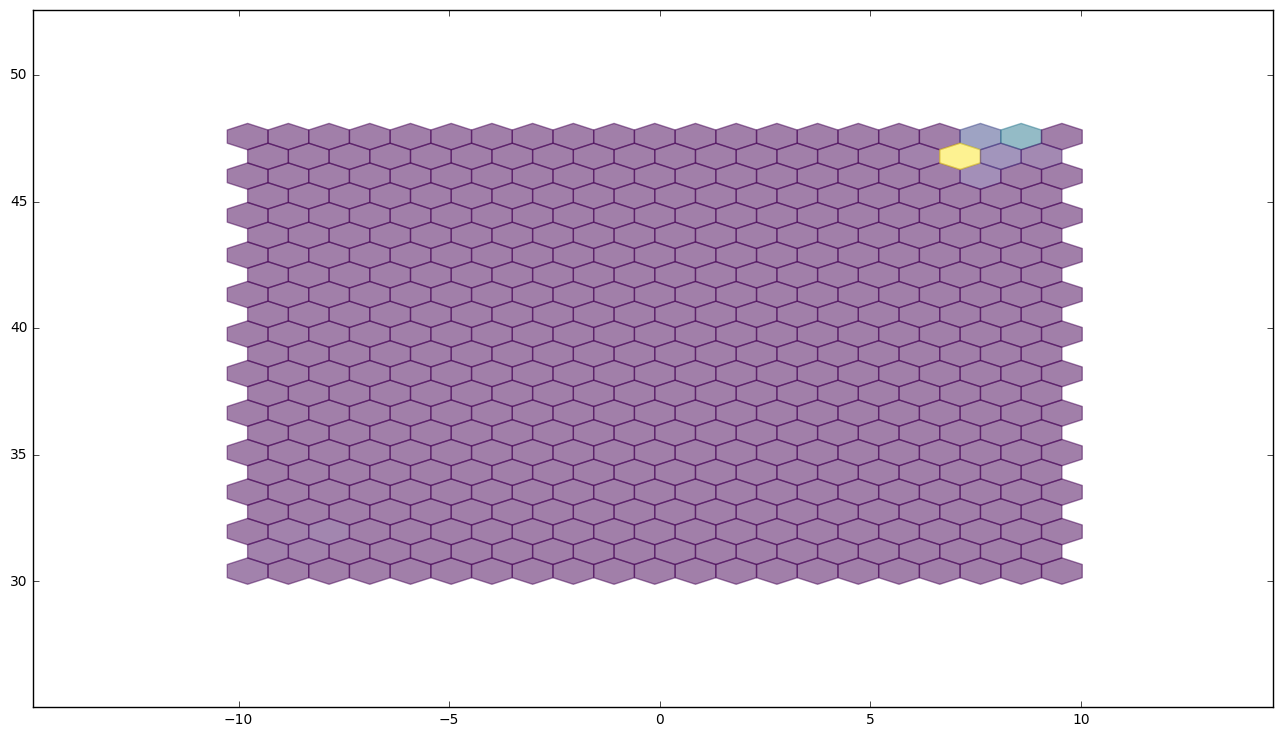

In [9]:
# Hexbin this thing, based on http://matplotlib.org/examples/pylab_examples/hexbin_demo.html
gridsize = 20

xmin = thisyear['lon'].min() - 5
xmax = thisyear['lon'].max() + 5
ymin = thisyear['lat'].min() - 5
ymax = thisyear['lat'].max() + 5

# plt.title("Hexagon binning")
# cb = plt.colorbar()
# cb.set_label('counts')
# plt.show()

plt.hexbin(thisyear['lon'][::50],thisyear['lat'][::50], cmap='viridis', alpha=0.5, gridsize=gridsize)
plt.axis([xmin, xmax, ymin, ymax])
plt.show()
# mplleaflet.display(tiles='stamen_wc')


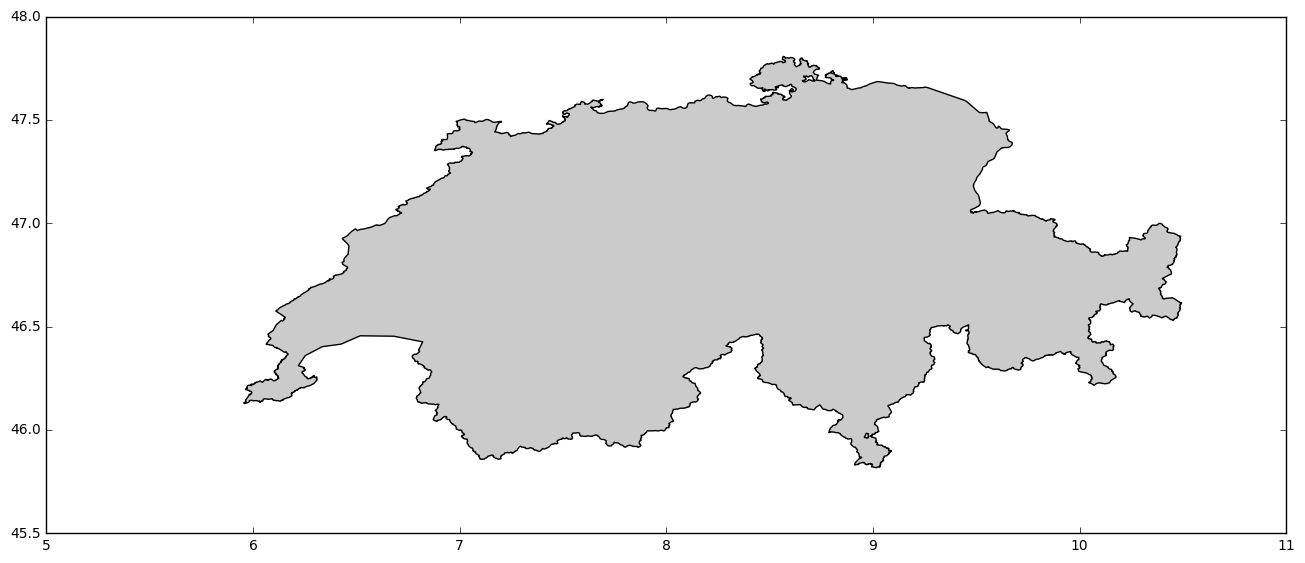

In [14]:
# http://lenguyenthedat.com/drawing-maps-python/
# https://mapzen.com/data/borders/
# https://s3.amazonaws.com/osm-polygons.mapzen.com/switzerland_geojson.tgz
import geopandas as gpd

switzerland = gpd.GeoDataFrame.from_file('admin_level_2.geojson')
switzerland.geometry.plot()

[5, 11, 45.5, 48]

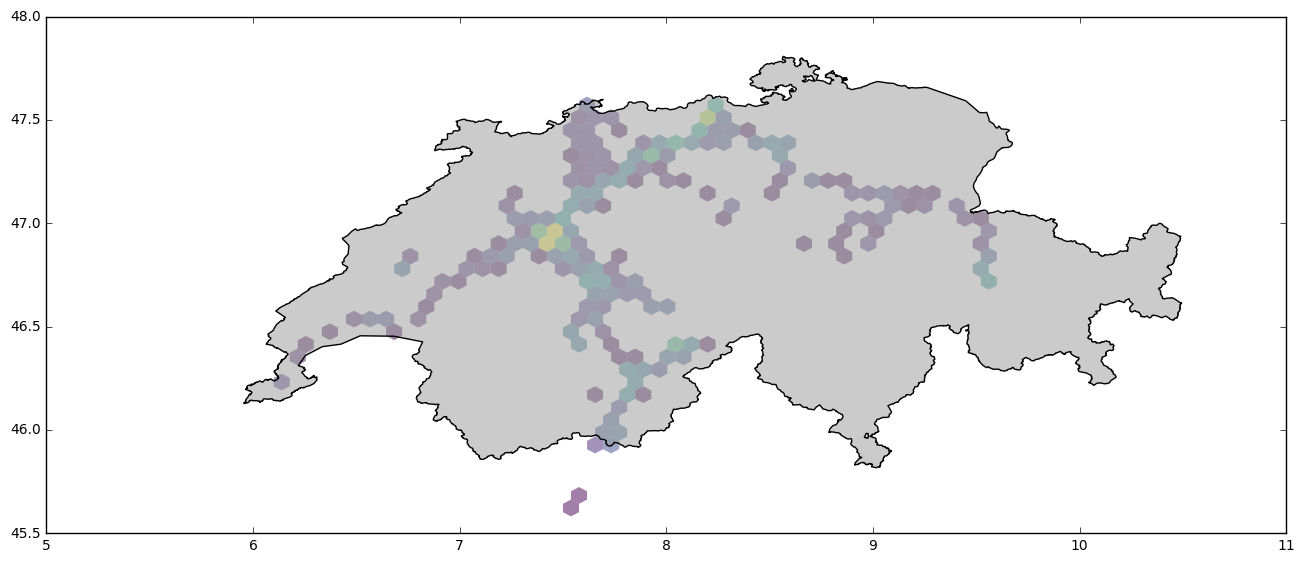

In [22]:
# https://s3.amazonaws.com/osm-polygons.mapzen.com/switzerland_geojson.tgz
gridsize = 250
switzerland.geometry.plot()
plt.hexbin(thisyear['lon'], thisyear['lat'],
           cmap='viridis',
           alpha=0.5,
           gridsize=gridsize,
           bins='log',
           mincnt=1,
           edgecolor='none',
           lw=0.2)
plt.axis([5, 11, 45.5, 48])
